<h1 style="color: blue; text-align:center;">LINEAR REGRESSION - New York</h1>
<p>Predicting temperatures according to pollution gases</p>

<h3>1. Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>2. Reading the data</h3>

In [2]:
data = pd.read_csv("data/new_york_data.csv")
data.head()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
0,2000,26.7193,7.4800,0.6205,0.0178,54.4
1,2001,28.5194,8.5596,0.6155,0.0180,56.7
2,2002,28.5194,8.5596,0.6155,0.0180,56.7
3,2003,26.7363,8.0057,0.6976,0.0174,54.4
4,2004,24.5736,7.0953,0.5793,0.0172,53.2


<h3>3. Analyzing the data</h3>

In [3]:
data.shape

(16, 6)

In [4]:
data.describe()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,22.755331,5.191363,0.473869,0.020450,55.743750
std,4.760952,3.965067,2.565833,0.135203,0.002731,1.489952
min,2000.000000,16.920600,1.005000,0.261900,0.017200,53.200000
25%,2003.750000,19.307250,3.521600,0.375450,0.018000,54.400000
50%,2007.500000,23.188050,5.390900,0.486000,0.019400,55.750000
75%,2011.250000,25.963525,7.424425,0.588350,0.023425,56.700000
max,2015.000000,28.519400,8.559600,0.697600,0.024600,58.200000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16 non-null     int64  
 1   NO2          16 non-null     float64
 2   SO2          16 non-null     float64
 3   CO           16 non-null     float64
 4   O3           16 non-null     float64
 5   Temperature  16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


In [6]:
data.isna().sum()

Unnamed: 0     0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
dtype: int64

<h3>4. Cleaning the data</h3>

In [7]:
data = data.set_index("Unnamed: 0")
data.index.name = None
data

,NO2,SO2,CO,O3,Temperature
2000,26.7193,7.4800,0.6205,0.0178,54.4
2001,28.5194,8.5596,0.6155,0.0180,56.7
2002,28.5194,8.5596,0.6155,0.0180,56.7
2003,26.7363,8.0057,0.6976,0.0174,54.4
2004,24.5736,7.0953,0.5793,0.0172,53.2
2005,25.7116,7.4059,0.5534,0.0192,54.8
2006,24.2292,5.9353,0.4766,0.0194,55.9
2007,23.2719,5.5669,0.5068,0.0194,58.2
2008,23.1042,5.2149,0.4954,0.0198,56.2
2009,21.6850,4.5121,0.4004,0.0194,55.6


In [8]:
data.corr()

,NO2,SO2,CO,O3,Temperature
NO2,1.000000,0.989789,0.947319,-0.929440,-0.083280
SO2,0.989789,1.000000,0.969065,-0.933323,-0.144046
CO,0.947319,0.969065,1.000000,-0.901708,-0.227478
O3,-0.929440,-0.933323,-0.901708,1.000000,0.206532
Temperature,-0.083280,-0.144046,-0.227478,0.206532,1.000000


<h3>5. Checking relation between data</h3>

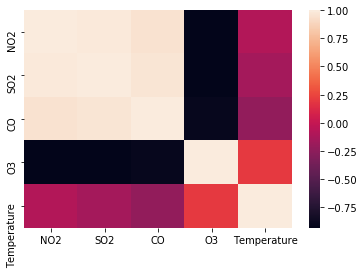

In [9]:
sns.heatmap(data.corr())

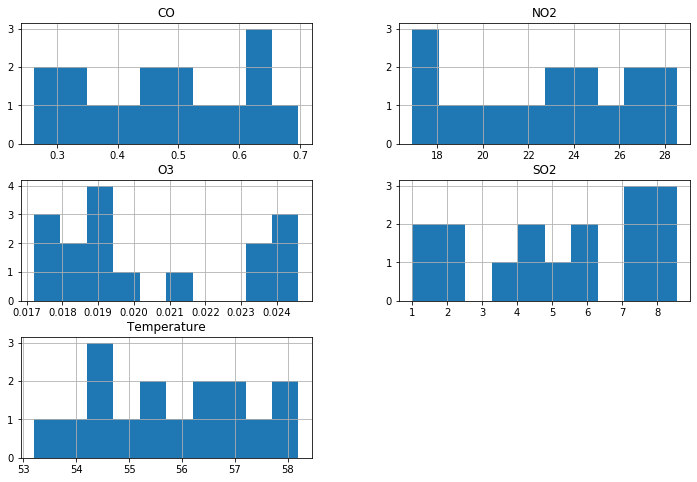

In [10]:
data[['NO2','SO2','CO','O3', 'Temperature']].hist(figsize=(12, 8))
plt.show()

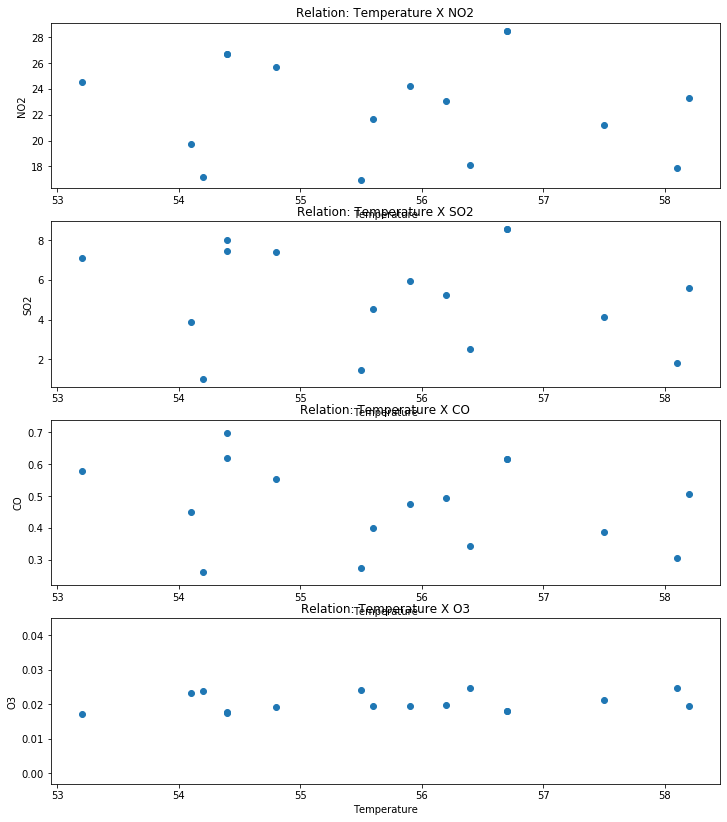

In [11]:
fig, axs = plt.subplots(4, figsize=(12,14))

axs[0].scatter(data['Temperature'], data['NO2'])
axs[0].set_title("Relation: Temperature X NO2")
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("NO2")

axs[1].scatter(data['Temperature'], data['SO2'])
axs[1].set_title("Relation: Temperature X SO2")
axs[1].set_xlabel("Temperature")
axs[1].set_ylabel("SO2")

axs[2].scatter(data['Temperature'], data['CO'])
axs[2].set_title("Relation: Temperature X CO")
axs[2].set_xlabel("Temperature")
axs[2].set_ylabel("CO")

axs[3].scatter(data['Temperature'], data['O3'])
axs[3].set_title("Relation: Temperature X O3")
axs[3].set_xlabel("Temperature")
axs[3].set_ylabel("O3")

plt.show()

<h3>6. Splitting the data</h3>

In [12]:
X = data[['NO2', 'CO', 'SO2', 'O3']].values
X

array([[2.67193e+01, 6.20500e-01, 7.48000e+00, 1.78000e-02],
       [2.85194e+01, 6.15500e-01, 8.55960e+00, 1.80000e-02],
       [2.85194e+01, 6.15500e-01, 8.55960e+00, 1.80000e-02],
       [2.67363e+01, 6.97600e-01, 8.00570e+00, 1.74000e-02],
       [2.45736e+01, 5.79300e-01, 7.09530e+00, 1.72000e-02],
       [2.57116e+01, 5.53400e-01, 7.40590e+00, 1.92000e-02],
       [2.42292e+01, 4.76600e-01, 5.93530e+00, 1.94000e-02],
       [2.32719e+01, 5.06800e-01, 5.56690e+00, 1.94000e-02],
       [2.31042e+01, 4.95400e-01, 5.21490e+00, 1.98000e-02],
       [2.16850e+01, 4.00400e-01, 4.51210e+00, 1.94000e-02],
       [1.97114e+01, 4.48800e-01, 3.85690e+00, 2.33000e-02],
       [2.12029e+01, 3.86100e-01, 4.10930e+00, 2.12000e-02],
       [1.80948e+01, 3.43500e-01, 2.51570e+00, 2.46000e-02],
       [1.79197e+01, 3.05700e-01, 1.80680e+00, 2.46000e-02],
       [1.69206e+01, 2.74900e-01, 1.43280e+00, 2.41000e-02],
       [1.71660e+01, 2.61900e-01, 1.00500e+00, 2.38000e-02]])

In [13]:
y = data['Temperature'].values
y

array([54.4, 56.7, 56.7, 54.4, 53.2, 54.8, 55.9, 58.2, 56.2, 55.6, 54.1,
       57.5, 56.4, 58.1, 55.5, 54.2])

In [14]:
# Split the dataset using Scikit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=15)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 4)
(4, 4)
(12,)
(4,)


<h3>7. Creating the Model</h3>

In [16]:
# Building your model using any of the algorithms, using Scikit learn library

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>8. Making Prediction</h3>

In [17]:
# Predict/Classify the model for test and training data sets

y_pred = model.predict(X_train)   
y_pred

array([55.14900912, 56.27345296, 56.32746541, 56.47298031, 56.0928627 ,
       56.48695954, 55.50009777, 55.73698885, 56.22555869, 55.82736179,
       56.17286382, 55.73439904])

In [18]:
y_pred_test = model.predict(X_test)   
y_pred_test

array([55.55362117, 56.57820223, 54.60323351, 56.27345296])

In [19]:
# Evaluate the model. Compare train and test and evaluate model.

data_predicted = pd.DataFrame({'ACTUAL': y_train, 'PREDICTED': np.around(y_pred, decimals=1)})
data_predicted

,ACTUAL,PREDICTED
0,54.1,55.1
1,56.7,56.3
2,54.2,56.3
3,55.9,56.5
4,58.1,56.1
5,57.5,56.5
6,54.4,55.5
7,58.2,55.7
8,55.5,56.2
9,56.4,55.8


In [20]:
data_predicted_test = pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': np.around(y_pred_test, decimals=1)})
data_predicted_test

,ACTUAL,PREDICTED
0,53.2,55.6
1,55.6,56.6
2,54.4,54.6
3,56.7,56.3


<h3>9. Showing Results</h3>

In [21]:
# Provide comparative results, like Accuracy, Score. 

model.score(X_train, y_train)

0.0805082655354673

In [22]:
model.score(X_test, y_test)

0.018669814874674232

In [23]:
y_train_round = np.around(y_train, 0)
y_pred_round = np.around(y_pred, 0)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_round, y_pred_round)

0.3333333333333333

In [25]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, y_train)
scores_train

array([-3.88781589, -4.39591456, -0.83899436, -2.11775185, -6.41617239])

In [26]:
list(zip(['NO2', 'CO', 'SO2', 'O3'], model.coef_))

[('NO2', 0.1971138871507962),
 ('CO', -14.108180612755596),
 ('SO2', 0.32906428523187436),
 ('O3', -36.341096764074734)]

In [27]:
model.intercept_

57.17294942096041

In [28]:
# Use the Scikit Learn to call functions r2_score, Mean Squared Error for train and testdata set.

from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.0805082655354673

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_train)

1.7853464510853028

In [30]:
# Design and explain your Confusion matrix. Also infer if your model is overfitting or underfitting.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_round, y_pred_round)

array([[0, 1, 2, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_train_round, y_pred_round))

              precision    recall  f1-score   support

        54.0       0.00      0.00      0.00         3
        55.0       0.00      0.00      0.00         1
        56.0       0.36      1.00      0.53         4
        57.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         3

    accuracy                           0.33        12
   macro avg       0.07      0.20      0.11        12
weighted avg       0.12      0.33      0.18        12



C:\Users\rmart\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
